In [1]:
import pandas as pd
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [10]:
import numpy as np
X =np.array(df['cgpa'])



y = np.array(df['package'])
# y_25 =np.sort(y)
y_25 = y[0:20]

n =int(len(y_25)*0.10)
# print(n)
# print(y_25[0:n])

mean= np.mean(y[0:-1])
min =np.min(y)
max = np.max(y)
std =np.std(y_25)
print(mean)


2.9993969849246227


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)



In [12]:
# def best_intialize(X_train,y_train):
#     for i in 



In [19]:

def predict(data,w,b):
    prediction =[w*x+b for x in data]
    return prediction


def improve(cost,ya,X_train,w,b):
    lr=0.01
    for i in range(1000):
        #decrease value of w and b if cost is negative else increase both
        
        w += lr*cost*std
        b += lr*cost
        prediction =predict(X_train,w,b)
        cost  = calculate_cost(ya,prediction)
        # error = list((ya[i]-prediction[i] for i in range(len(ya))))
        # w_grad =sum(error)/len(ya)
        # b = sum(error)/len(ya)
        # w += lr*w_grad
        # b += lr*b
        # cost  = calculate_cost(ya,prediction)
        
        
    return (cost,w,b)
    
def calculate_cost(ya,yp):
    # print("here",ya,yp)
    # print((ya-yp))
    error = [(ya[i]-yp[i]) for i in range(len(ya))]
    cost = sum(error)/len(ya)
    
    return cost
def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # print(cost)
    # print("mean value ",X_train.mean()) 
    cost,w,b = improve(cost,y_train,X_train,w,b)
    # print("training",cost)
    prediction =predict(X_train,w,b)
    # cost  = calculate_cost(y_test,prediction)
    # print(prediction)
    # print(cost,w,b)
    return prediction,w,b,cost



prediction,w,b,cost = fit_model(X_train,y_train,1,0.557)
print(b)
print(cost)
# print(y_train)

    


-0.01159017983557642
-4.9960036108132046e-17


In [20]:
print(prediction[0])
print(y_train[0])

3.0686759361384244
3.13


# cost is negative (-3.9859) when w=1,b=0
# cost is negative (-5.3839875) when w=1.2,b=0
# cost is negative (-5.8839875) when w=1.2,b=0.5
# conclusion so by increasing value of w and b error increased in negative side , move toward negative side
# cost is posiutive (1.10595) when w=0.2,b=0.5
# cost is positive (1.40595) when w=0.2,b=0.2
# conclusion by decreasing value of w and b the error moved towards positive side /


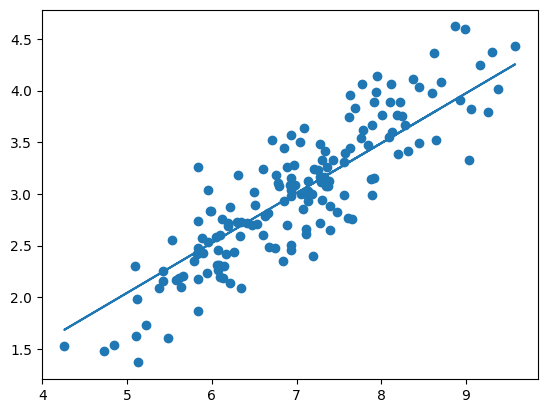

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_train,prediction)